In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import csv
import seaborn as sns

In [2]:
yt_data_us = r"C:\Users\mjeas\Desktop\CoderGirl\YT_Data\USvideos.csv"
yt_df = pd.read_csv(yt_data_us)

In [3]:
yt_df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


In [4]:
yt_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                40949 non-null  object
 1   trending_date           40949 non-null  object
 2   title                   40949 non-null  object
 3   channel_title           40949 non-null  object
 4   category_id             40949 non-null  int64 
 5   publish_time            40949 non-null  object
 6   tags                    40949 non-null  object
 7   views                   40949 non-null  int64 
 8   likes                   40949 non-null  int64 
 9   dislikes                40949 non-null  int64 
 10  comment_count           40949 non-null  int64 
 11  thumbnail_link          40949 non-null  object
 12  comments_disabled       40949 non-null  bool  
 13  ratings_disabled        40949 non-null  bool  
 14  video_error_or_removed  40949 non-null  bool  
 15  de

In [5]:
#Look for Null/missing Values
missing_values_count = yt_df.isnull().sum()
missing_values_count

#Looks like descriptions is the only column that is missing data. This is fine since I will not be using this category for my analysis anyways.

video_id                    0
trending_date               0
title                       0
channel_title               0
category_id                 0
publish_time                0
tags                        0
views                       0
likes                       0
dislikes                    0
comment_count               0
thumbnail_link              0
comments_disabled           0
ratings_disabled            0
video_error_or_removed      0
description               570
dtype: int64

In [6]:
#Checking for duplicate values where there shouldn't be any.There should be no duplicates in video_id

#I discovered that some of the vales will be duplicates. A video can be a top streamer for more than one day running thus, there will be duplicates in the data.

yt_df.nunique(axis=0)

video_id                   6351
trending_date               205
title                      6455
channel_title              2207
category_id                  16
publish_time               6269
tags                       6055
views                     40478
likes                     29850
dislikes                   8516
comment_count             13773
thumbnail_link             6352
comments_disabled             2
ratings_disabled              2
video_error_or_removed        2
description                6901
dtype: int64

In [7]:
yt_df.shape

(40949, 16)

In [8]:
yt_df.describe().apply(lambda s: s.apply(lambda x: format(x, 'f')))

,category_id,views,likes,dislikes,comment_count
count,40949.000000,40949.000000,40949.000000,40949.000000,40949.000000
mean,19.972429,2360784.638257,74266.702435,3711.400889,8446.803683
std,7.568327,7394113.759704,228885.338209,29029.705945,37430.486994
min,1.000000,549.000000,0.000000,0.000000,0.000000
25%,17.000000,242329.000000,5424.000000,202.000000,614.000000
50%,24.000000,681861.000000,18091.000000,631.000000,1856.000000
75%,25.000000,1823157.000000,55417.000000,1938.000000,5755.000000
max,43.000000,225211923.000000,5613827.000000,1674420.000000,1361580.000000


In [9]:
#THIS IS WHERE I WILL DROP ALL STUFF I DO NOT WANT

yt_clean = yt_df.drop(['thumbnail_link','video_error_or_removed','description'], axis=1)

yt_clean.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,False,False
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,False,False
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,False,False
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,False,False
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,False,False


In [10]:
#yt_clean['split'] = yt_clean.tags.str.split("|").tolist()
#yt_clean['tags']= yt_clean.tags.str.split("|").tolist()

#yt_clean = (yt_clean.set_index(['video_id','trending_date','title','channel_title', 'category_id', 'publish_time'])['tags'].apply(pd.Series).stack().reset_index().rename(columns={0:'tags'}))

In [10]:
#Created seperate dataframe that only has video id and tag info
#Doing this so I can break out the tag values

yt_tags = [yt_clean["video_id"], yt_clean["tags"]]

In [11]:
#Transposing the dataframe so I have the correct column headers
yt_tags_df = pd.DataFrame(yt_tags)
yt_tags_df= yt_tags_df.transpose()

In [12]:
yt_tags_df

,video_id,tags
0,2kyS6SvSYSE,SHANtell martin
1,1ZAPwfrtAFY,"last week tonight trump presidency|""last week ..."
2,5qpjK5DgCt4,"racist superman|""rudy""|""mancuso""|""king""|""bach""..."
3,puqaWrEC7tY,"rhett and link|""gmm""|""good mythical morning""|""..."
4,d380meD0W0M,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""..."
...,...,...
40944,BZt0qjTWNhw,"aarons animals|""aarons""|""animals""|""cat""|""cats""..."
40945,1h7KV2sjUWY,[none]
40946,D6Oy4LfoqsU,I gave safiya nygaard a perfect hair makeover ...
40947,oV0zkMe1K8s,"Black Panther|""HISHE""|""Marvel""|""Infinity War""|..."


In [13]:
yt_tags_df.iloc[1]['tags']

'last week tonight trump presidency|"last week tonight donald trump"|"john oliver trump"|"donald trump"'

In [14]:
#Need to split tag values where all '|' values are
#yt_tags_df['split'] = yt_tags_df['tags'].str.split("|")
#yt_tags_df.drop(['tags'], axis= 1)

yt_tags_split = pd.DataFrame(yt_tags_df.tags.str.split("|").tolist(), index= yt_tags_df.video_id).stack()
yt_tags_split = yt_tags_split.reset_index([0, 'video_id'])
yt_tags_split.columns = ['video_id', 'tags']


yt_tags_split.head()

,video_id,tags
0,2kyS6SvSYSE,SHANtell martin
1,1ZAPwfrtAFY,last week tonight trump presidency
2,1ZAPwfrtAFY,"""last week tonight donald trump"""
3,1ZAPwfrtAFY,"""john oliver trump"""
4,1ZAPwfrtAFY,"""donald trump"""


In [164]:
#yt_tags_df.iloc[1]['split']

#convert split column to a string/object value
#yt_tags_df['split']= yt_tags_df['split'].astype(str)

#yt_tags_df.head()

#Do I need to get rid of the quotes for the analysis to work properly?

<AxesSubplot:>

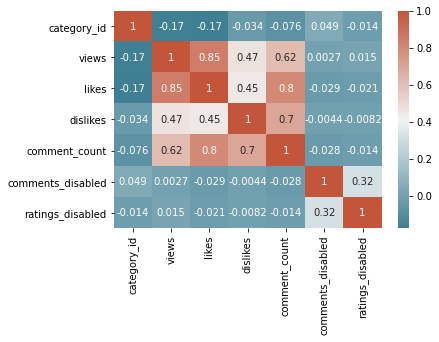

In [11]:
corr = yt_clean.corr()# plot the heatmap
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

<AxesSubplot:xlabel='likes', ylabel='views'>

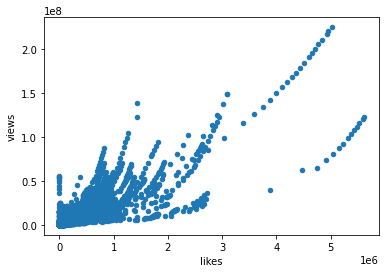

In [12]:
yt_clean.plot(kind='scatter', x='likes', y='views')

<AxesSubplot:xlabel='category_id', ylabel='views'>

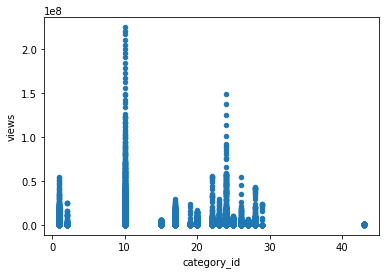

In [13]:
yt_clean.plot(kind='scatter', x='category_id', y='views')

In [ ]:
sns.pairplot(df_cleaned)